###### Анализ расходов в Jupyter Notebook
за период с 5 февраля 2019 года по 5 февраля 2020 года

In [1]:
import analyze
from parse import spends
import matplotlib.pyplot as plt

spends_list = spends()

for i in range(5):
    name = spends_list[i]['name']
    date_to_plot = spends_list[i]['date_to_plot']
    summ = spends_list[i]['summ']
    cat = spends_list[i]['cat']
    print(name, date_to_plot, summ, cat)
    
print('...')

QIWI BANK 2020-02-03 00:00:00 200.0 Прочие расходы
SCHUKINSKAYA 2020-02-01 00:00:00 405.0 Транспорт
KINOBAR CENTRALNYI 2020-01-26 00:00:00 960.0 Рестораны и кафе
BURGER KING 0078 2020-01-26 00:00:00 162.98 Рестораны и кафе
P2P_byPhone_tinkoff-bank 2020-01-26 00:00:00 1515.0 Прочие расходы
...


- Всего расходов:

In [2]:
print(len(spends_list))

254


- ... на сумму:

In [3]:
s = 0
for i in spends_list:
    s += i['summ']

print(s)

215899.68000000002


- График *Scatter* всех трат за период

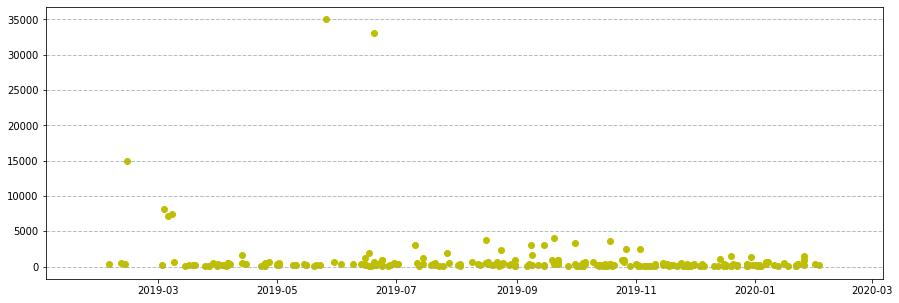

In [4]:
DATES = [d['date_to_plot'] for d in spends_list]
SUMS = [s['summ'] for s in spends_list]

plt.figure(figsize=(15, 5))
plt.scatter(DATES, SUMS, color='y')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

>Видно, что присутствует много мелких значений, которые сливыаются между собой.
>Отфильтруем большие значения и сузим диапазон тем самым. Ограничим его, скажем, 15к.

- График *Scatter* для трат меньше 15k

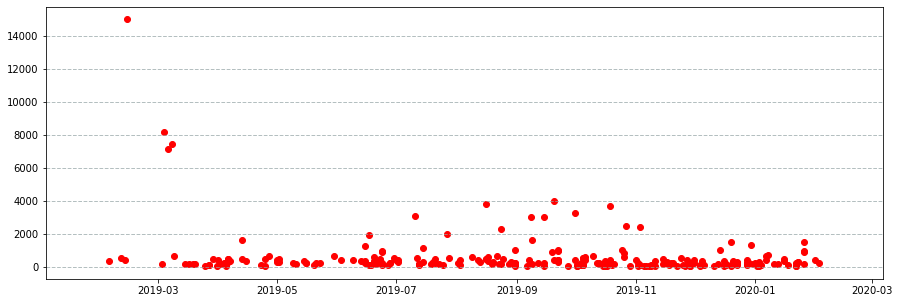

In [5]:
DATES_reduced = [d['date_to_plot'] for d in spends_list if d['summ'] <= 15000]
SUMS_reduced = [s['summ'] for s in spends_list if s['summ'] <= 15000]

plt.figure(figsize=(15, 5))
plt.scatter(DATES_reduced, SUMS_reduced, color='r')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

>Но всё же этого не достаточно,
>ещё уменьшим масштаб. До 5к.

- График *Scatter* для трат меньше 5k

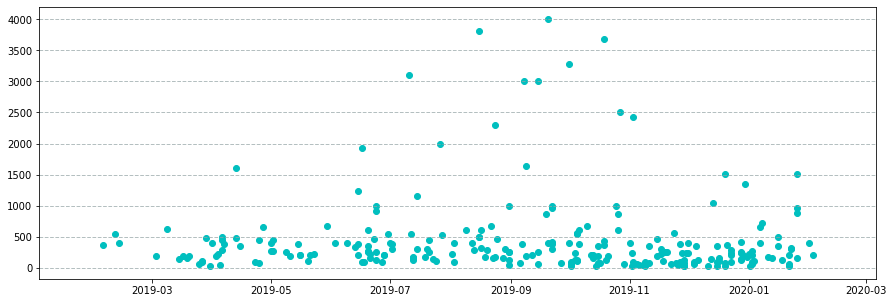

In [6]:
DATES_reduced_2 = [d['date_to_plot'] for d in spends_list if d['summ'] <= 5000]
SUMS_reduced_2 = [s['summ'] for s in spends_list if s['summ'] <= 5000]

plt.figure(figsize=(15, 5))
plt.scatter(DATES_reduced_2, SUMS_reduced_2, color='c')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

> Вау! Выглядит гораздо лучше. 
>
> Теперь заметно, что больше всего мелких трат, примерно до тысячи.
>
> Ну и последний раз...

- График *Scatter* для трат меньше 1k

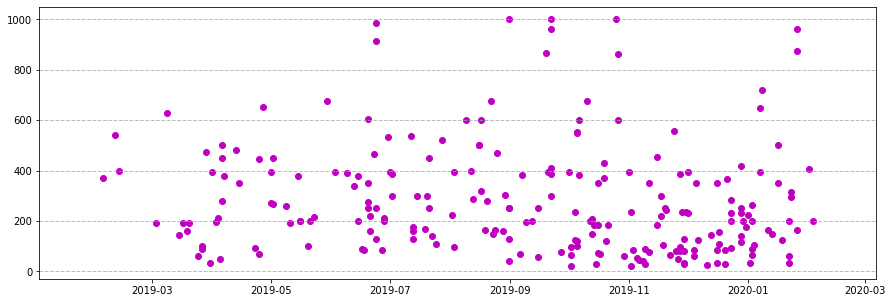

In [7]:
DATES_reduced_3 = [d['date_to_plot'] for d in spends_list if d['summ'] <= 1000]
SUMS_reduced_3 = [s['summ'] for s in spends_list if s['summ'] <= 1000]

plt.figure(figsize=(15, 5))
plt.scatter(DATES_reduced_3, SUMS_reduced_3, color='m')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

- Общее количество трат меньше тысячи:

In [8]:
print(len(SUMS_reduced_3), 'из', len(SUMS))
print('На общую сумму:', sum(SUMS_reduced_3))

228 из 254
На общую сумму: 64041.450000000026


- Рассмотрим 4 предыдущих диапазона:
> Меньше 1к
>
> От 1 до 5
>
> От 5 до 15
>
> И больше 15

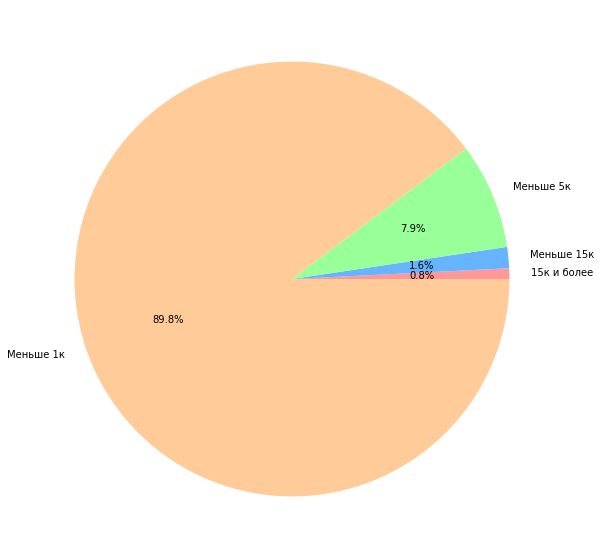

In [9]:
total = len(SUMS)
less_1k = len(SUMS_reduced_3)
_1k_5k = len(SUMS_reduced_2) - less_1k
_5k_15k = len(SUMS_reduced) - _1k_5k - less_1k
_15_or_greater = total - _5k_15k - _1k_5k - less_1k

sums_range = [_15_or_greater, _5k_15k, _1k_5k, less_1k]
y_axis = ['15к и более','Меньше 15к', 'Меньше 5к', 'Меньше 1к']

#clr = ['mediumorchid', 'blueviolet', 'navy', 'royalblue', 'darkslategrey', 'limegreen', 
# 'darkgreen', 'yellow', 'darkorange', 'orangere']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(10,10))
plt.pie(sums_range, labels=y_axis, autopct='%1.1f%%', colors = colors)
plt.show()

In [10]:
for i in range(len(sums_range)):
    print(y_axis[i],':', sums_range[i])

15к и более : 2
Меньше 15к : 4
Меньше 5к : 20
Меньше 1к : 228


- Средний месячный расход:

In [11]:
average = sum(SUMS)/12
print(average)

17991.640000000003


> *В дальнейшем предлагается скорректировать эту сумму с учётом снятия средств в банкомате*

- Столбчатая диаграмма помесячно

In [12]:
per_month_list = analyze.plot_per_month(spends_list)

for i in range(len(per_month_list)):
    print(i+1, per_month_list[i])

1 8453.820000000002
2 16915.0
3 25048.260000000002
4 6156.84
5 38803.560000000005
6 43673.93000000001
7 10565.029999999999
8 14073.779999999999
9 17189.78
10 18477.67
11 7668.7699999999995
12 8873.24


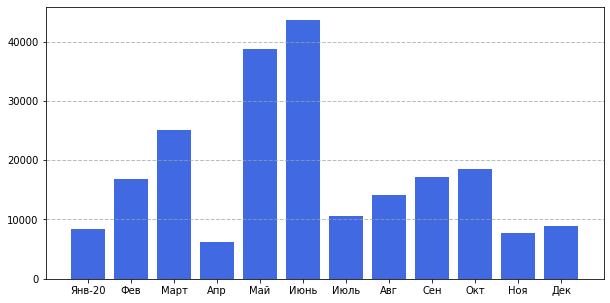

In [13]:
plt.figure(figsize=(10,5))
plt.bar(analyze.monthes_axis, per_month_list, color='royalblue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

- Все уникальные имена транзакций:

In [14]:
names = analyze.get_names(spends_list)
for n in names:
    print(n)

SBOL перевод 4276****2180 С. НАТАЛЬЯ АЛЕКСЕЕВНА
BURGER KING 0445
P2P_byPhone_tinkoff-bank
YM ALIEXPRESS
APTECHNOE UCHREZHD-IE
MOSMETRO.RU KSCHUKINSK
YM.INTERNET
BURGER KING 0271
RESTORAN TAKI DA
KFC NAR. OPOLCHENIYA
OOO SYROMYATNIKI-K
BURGER KING 0036
PYATEROCHKA 7873
JEFFREYS COFFEE
OOO TIKETSKLAUD
KINOBAR CENTRALNYI
KOSMOS
APTEKA-RIELTI
IP Lobyntsev M. A.
EDUCATION CENTRE WINDS
OOO KNIZHNYY LABIRINT
IP Miller D.A
KFC EVROPPA DZHAMP
ADMIRAL
SBOL перевод 6762****2090 Ц. ИГОРЬ АЛЕКСАНДРОВИЧ
SBOL перевод 5469****3493 А. ЕВГЕНИЙ ВИКТОРОВИЧ
BURGER KING 0361
AUCHAN KRASNOGORSK
KFC STARYY ARBAT
BUFET CHAIYNYIY STOL
PEREKRYOSTOK LADOZHSKAYA
KAFETERIIY ULK ETAZH 6
COFIX CVETNOJ
Pekarnya GlavPirog
BURGER KING 0014
MCDONALDS 24402
ATM 60008859
SBOL перевод 2202****9277 П. ВАСИЛИЙ ДМИТРИЕВИЧ
Produkti
VIETBAP CAFE
PROIZVODSTVO N 8
PRODUKTY I ODEZHDA
GUSTAV KLIMT
ATM 60008860
IP NGUEN
WWW.VELOBIKE.RU
MCDONALDS 24474
OAO MTS C9153266863
MOSMETRO.RU ASCHUKINSK
ALIEXPRESS
KIOSK ULK 1 ETAZH
SBOL перево

Очень много категорий, и все разные. Попробуем уменьшить.

LM = LeroyMerlen,

SBOL объединить в один, MOSMETRO, Cofix

Aliexpress, BURGERKING, KFC и ATM - тоже.

- Проанализируем крупные траты, aka >= 5000

In [15]:
s = 0
j = 0
for i in spends_list:
    if i['summ'] >= 5000:
        name = i['name'].ljust(15)
        date = i['date_hr'].ljust(26)
        sum_ = i['summ']
        cat = i['cat']
        s += sum_
        j += 1
        
        print(name, date, sum_, cat)
print()        
print('Всего', j, 'списаний на сумму', s)

ATM 60008859    20 июня 2019 16:18:53      33000.0 Выдача наличных
ATM 60008858    26 мая 2019 13:24:16       35000.0 Выдача наличных
PLEER.RU        8 марта 2019 13:54:06      7453.0 Все для дома
REGARD.RU       6 марта 2019 15:01:32      7140.0 Все для дома
ONLINETRADE.RU  4 марта 2019 14:04:18      8190.0 Супермаркеты
ATM 60008858    13 февраля 2019 13:15:51   15000.0 Выдача наличных

Всего 6 списаний на сумму 105783.0


- Выведем все снятия наличных в банкомате:

In [16]:
s = 0
for i in spends_list:
    name = i['name']
    if 'ATM' in name:
        s += i['summ']
        print(name, i['summ'], i['date_hr'], i['cat'])

print()
print('На сумму', s)

ATM 60008859 3000.0 15 сентября 2019 12:20:51 Выдача наличных
ATM 60008860 3000.0 8 сентября 2019 13:35:36 Выдача наличных
ATM 60008859 33000.0 20 июня 2019 16:18:53 Выдача наличных
ATM 60008858 35000.0 26 мая 2019 13:24:16 Выдача наличных
ATM 60008858 15000.0 13 февраля 2019 13:15:51 Выдача наличных

На сумму 89000.0


- Всего переводов другим физ. лицам:

In [17]:
s = 0
for i in spends_list:
    name = i['name']
    if 'SBOL' in name:
        s += i['summ']
        print(name.ljust(54), str(i['summ']).ljust(7), i['date_hr'], i['cat'])
        
print()
print('На сумму', s)

SBOL перевод 4276****8411 Л. ЯКОВ АЛЕКСАНДРОВИЧ        875.0   26 января 2020 11:30:16 Перевод с карты
SBOL перевод 5469****8841 Д. ЕЛЕНА ЮРЬЕВНА             500.0   16 января 2020 11:40:24 Перевод с карты
SBOL перевод 4279****5299 О. ГЕОРГИЙ ВИКТОРОВИЧ        720.0   8 января 2020 11:27:34 Перевод с карты
SBOL перевод 5469****8841 Д. ЕЛЕНА ЮРЬЕВНА             224.0   1 января 2020 00:36:20 Перевод с карты
SBOL перевод 5469****8841 Д. ЕЛЕНА ЮРЬЕВНА             230.0   1 декабря 2019 16:35:12 Перевод с карты
SBOL перевод 4276****5319 Ш. АЛЬБИНА ФАИМОВНА          2500.0  27 октября 2019 15:55:56 Перевод с карты
SBOL перевод 4276****5319 Ш. АЛЬБИНА ФАИМОВНА          1000.0  25 октября 2019 15:29:45 Перевод с карты
SBOL перевод 2202****9277 П. ВАСИЛИЙ ДМИТРИЕВИЧ        30.0    15 октября 2019 20:24:13 Перевод с карты
SBOL перевод 5469****2982 М. АРТЕМ КОНСТАНТИНОВИЧ      1640.0  9 сентября 2019 13:30:09 Перевод с карты
SBOL перевод 5469****7885 П. ВАСИЛИЙ ДМИТРИЕВИЧ        70.0    6 сентяб

In [18]:
s = 0
for i in spends_list:
    name = i['name']
    if 'BURGER ' in name or 'KFC' in name or 'MCDONALDS' in name:
        s += i['summ']
        print(name.ljust(22), str(i['summ']).ljust(10), i['date_hr'], i['cat'])
        
print()
print('На сумму', s)

BURGER KING 0078       162.98     26 января 2020 19:19:59 Рестораны и кафе
BURGER KING 0361       296.96     23 января 2020 17:32:32 Рестораны и кафе
MCDONALDS 24431        262.0      3 января 2020 18:42:26 Рестораны и кафе
MCDONALDS 24402        285.0      23 декабря 2019 17:30:36 Рестораны и кафе
MCDONALDS 24431        235.0      28 ноября 2019 17:24:46 Рестораны и кафе
MCDONALDS 24474        220.0      17 ноября 2019 20:14:11 Рестораны и кафе
MCDONALDS 24402        184.0      15 ноября 2019 19:10:15 Рестораны и кафе
MCDONALDS 11005        84.0       3 ноября 2019 23:23:07 Рестораны и кафе
MCDONALDS 24474        235.0      2 ноября 2019 21:06:44 Рестораны и кафе
BURGER KING 0361       863.93     26 октября 2019 17:07:46 Рестораны и кафе
KFC EVROPPA DZHAMP     370.0      19 октября 2019 20:48:24 Рестораны и кафе
MCDONALDS 24402        185.0      16 октября 2019 19:54:34 Рестораны и кафе
MCDONALDS 24431        210.0      13 октября 2019 16:45:47 Рестораны и кафе
BURGER KING 0036       

In [19]:
s = 0
for i in spends_list:
    name = i['name']
    if 'WINDS' in name:
        s += i['summ']
        print(name, i['summ'], i['date_hr'], i['cat'])
        
print()
print('На сумму', s)

EDUCATION CENTRE WINDS 3100.0 11 июля 2019 21:29:40 Образование

На сумму 3100.0


In [20]:
s = 0
for i in spends_list:
    name = i['name']
    if 'MOSMETRO' in name:
        s += i['summ']
        print(name, i['summ'], i['date_hr'], i['cat'])
        
print()
print('На сумму', s)

MOSMETRO.RU ASCHUKINSK 395.0 1 ноября 2019 07:31:17 Транспорт
MOSMETRO.RU ASCHUKINSK 395.0 1 октября 2019 06:52:24 Транспорт
MOSMETRO.RU ASCHUKINSK 395.0 20 сентября 2019 00:30:30 Транспорт
MOSMETRO.RU ASCHUKINSK 250.0 31 августа 2019 09:10:22 Транспорт
MOSMETRO.RU ASCHUKINSK 395.0 3 августа 2019 16:19:39 Транспорт
MOSMETRO.RU KSCHUKINSK 395.0 1 июля 2019 06:50:09 Транспорт
MOSMETRO.RU ASCHUKINSK 250.0 24 июня 2019 14:32:09 Транспорт
MOSMETRO.RU KSCHUKINSK 395.0 3 июня 2019 06:49:08 Транспорт
MOSMETRO.RU KSCHUKINSK 395.0 1 мая 2019 13:42:08 Транспорт
MOSMETRO.RU KBAUMANSKA 395.0 1 апреля 2019 15:31:01 Транспорт

На сумму 3660.0


In [21]:
s = 0
for i in spends_list:
    name = i['name']
    if 'MTS' in name:
        s += i['summ']
        print(name, i['summ'], i['date_hr'], i['cat'])
        
print()
print('На сумму', s)

OAO MTS C9153266863 150.0 23 августа 2019 18:07:51 Коммунальные платежи, связь, интернет
OAO MTS C9153266863 400.0 12 августа 2019 11:48:51 Коммунальные платежи, связь, интернет
OAO MTS C9153266863 300.0 15 июля 2019 13:36:43 Коммунальные платежи, связь, интернет
OAO MTS C9153266863 380.0 15 июня 2019 13:27:11 Коммунальные платежи, связь, интернет
OAO MTS C9153266863 380.0 15 мая 2019 17:29:51 Коммунальные платежи, связь, интернет
OAO MTS C9153266863 350.0 15 апреля 2019 16:07:41 Коммунальные платежи, связь, интернет
OAO MTS C9153266863 400.0 12 февраля 2019 09:31:39 Коммунальные платежи, связь, интернет

На сумму 2360.0
